In [1]:
import pandas as pd

# Full file path
file_path = r"C:\Projects\student_performance_socioeconomic.csv.xlsx"

# Read Excel file (first sheet by default)
df = pd.read_excel(file_path)

# Preview
df.head()



,Student_ID,Age,Gender,Marital_Status,Course_Chosen,Application_Mode,Residence_Location,Parental_Education,Parental_Income_Level,Employment_Status,...,Retention,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,Attendance,Grade_Average,Study_Career,Residence_Type,Socioeconomic_Level
0,STUD_496,23,Male,Single,Technologies,Online,Suburban,Master,65990.0,Part-time,...,1,5,2.5,25000,2019,95.130795,2.651185,Engineering,Urban,Low
1,STUD_191,20,Male,Married,Education,Online,Suburban,High School,65052.0,Employed,...,0,5,2.5,25000,2020,64.975345,2.240700,Science,Urban,Medium
2,STUD_125,23,Female,Married,Agronomy,In-person,Suburban,Bachelor,69334.0,Unemployed,...,0,5,2.5,25000,2019,81.198633,2.467673,Arts,Rural,Low
3,STUD_304,21,Male,Divorced,Agronomy,Online,Suburban,Bachelor,36497.0,Employed,...,0,5,2.5,25000,2019,82.147293,3.398225,Arts,Urban,Medium
4,STUD_357,26,Male,Single,Management,Online,Suburban,Bachelor,97292.0,Employed,...,0,5,2.5,25000,2018,90.289416,3.508945,Engineering,Urban,Low


In [2]:
df.to_csv(r"C:\Projects\education-performance-analytics\data\student_performance_socioeconomic.csv", index=False)


In [3]:
import os
os.listdir(r"C:\Projects\education-performance-analytics\data")


['student_performance_socioeconomic.csv']

# Import and Load the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Projects\education-performance-analytics\data\student_performance_socioeconomic.csv")

# Display first 5 rows
df.head()


,Student_ID,Age,Gender,Marital_Status,Course_Chosen,Application_Mode,Residence_Location,Parental_Education,Parental_Income_Level,Employment_Status,...,Retention,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,Attendance,Grade_Average,Study_Career,Residence_Type,Socioeconomic_Level
0,STUD_496,23,Male,Single,Technologies,Online,Suburban,Master,65990.0,Part-time,...,1,5,2.5,25000,2019,95.130795,2.651185,Engineering,Urban,Low
1,STUD_191,20,Male,Married,Education,Online,Suburban,High School,65052.0,Employed,...,0,5,2.5,25000,2020,64.975345,2.240700,Science,Urban,Medium
2,STUD_125,23,Female,Married,Agronomy,In-person,Suburban,Bachelor,69334.0,Unemployed,...,0,5,2.5,25000,2019,81.198633,2.467673,Arts,Rural,Low
3,STUD_304,21,Male,Divorced,Agronomy,Online,Suburban,Bachelor,36497.0,Employed,...,0,5,2.5,25000,2019,82.147293,3.398225,Arts,Urban,Medium
4,STUD_357,26,Male,Single,Management,Online,Suburban,Bachelor,97292.0,Employed,...,0,5,2.5,25000,2018,90.289416,3.508945,Engineering,Urban,Low


# Overview of columns & data types

In [5]:
# Information about data types, non-null counts, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                496 non-null    object 
 1   Age                       504 non-null    int64  
 2   Gender                    504 non-null    object 
 3   Marital_Status            504 non-null    object 
 4   Course_Chosen             504 non-null    object 
 5   Application_Mode          504 non-null    object 
 6   Residence_Location        504 non-null    object 
 7   Parental_Education        504 non-null    object 
 8   Parental_Income_Level     504 non-null    float64
 9   Employment_Status         504 non-null    object 
 10  Semester_Enrolled_Units   504 non-null    int64  
 11  Semester_Credited_Units   504 non-null    int64  
 12  Semester_Evaluated_Units  504 non-null    int64  
 13  Semester_Approved_Units   504 non-null    int64  
 14  Semester_A

# Drop missing rows

In [6]:
# Drop rows with missing Student_ID
df = df.dropna(subset=["Student_ID"])

# Fill missing Semester_Average_Grade with the mean value
df["Semester_Average_Grade"] = df["Semester_Average_Grade"].fillna(df["Semester_Average_Grade"].mean())

# Confirm missing values are fixed
df.isna().sum()

Student_ID                  0
Age                         0
Gender                      0
Marital_Status              0
Course_Chosen               0
Application_Mode            0
Residence_Location          0
Parental_Education          0
Parental_Income_Level       0
Employment_Status           0
Semester_Enrolled_Units     0
Semester_Credited_Units     0
Semester_Evaluated_Units    0
Semester_Approved_Units     0
Semester_Average_Grade      0
Retention                   0
Unemployment_Rate           0
Inflation_Rate              0
Regional_GDP                0
Year                        0
Attendance                  0
Grade_Average               0
Study_Career                0
Residence_Type              0
Socioeconomic_Level         0
dtype: int64

# Remove duplicates

In [7]:
# Remove duplicates
df = df.drop_duplicates()

# Confirm the change
print("Remaining duplicates:", df.duplicated().sum())
print("New shape of dataset:", df.shape)


Remaining duplicates: 0
New shape of dataset: (444, 25)


In [8]:
# Check unique values for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Student_ID: 444 unique values
Gender: 2 unique values
Marital_Status: 4 unique values
Course_Chosen: 8 unique values
Application_Mode: 3 unique values
Residence_Location: 3 unique values
Parental_Education: 4 unique values
Employment_Status: 3 unique values
Study_Career: 4 unique values
Residence_Type: 2 unique values
Socioeconomic_Level: 3 unique values


# Convert Encoded Data

In [9]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["Gender", "Marital_Status", "Course_Chosen", "Application_Mode",
              "Residence_Location", "Employment_Status", "Study_Career",
              "Residence_Type", "Socioeconomic_Level"]

encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,Student_ID,Age,Gender,Marital_Status,Course_Chosen,Application_Mode,Residence_Location,Parental_Education,Parental_Income_Level,Employment_Status,...,Retention,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,Attendance,Grade_Average,Study_Career,Residence_Type,Socioeconomic_Level
0,STUD_496,23,1,2,7,1,1,Master,65990.0,1,...,1,5,2.5,25000,2019,95.130795,2.651185,2,1,1
1,STUD_191,20,1,1,2,1,1,High School,65052.0,0,...,0,5,2.5,25000,2020,64.975345,2.240700,3,1,2
2,STUD_125,23,0,1,0,0,1,Bachelor,69334.0,2,...,0,5,2.5,25000,2019,81.198633,2.467673,0,0,1
3,STUD_304,21,1,0,0,1,1,Bachelor,36497.0,0,...,0,5,2.5,25000,2019,82.147293,3.398225,0,1,2
4,STUD_357,26,1,2,4,1,1,Bachelor,97292.0,0,...,0,5,2.5,25000,2018,90.289416,3.508945,2,1,1


# Summary statistics

In [10]:
# Basic statistical summary for numeric columns
df.describe()


,Age,Gender,Marital_Status,Course_Chosen,Application_Mode,Residence_Location,Parental_Income_Level,Employment_Status,Semester_Enrolled_Units,Semester_Credited_Units,...,Retention,Unemployment_Rate,Inflation_Rate,Regional_GDP,Year,Attendance,Grade_Average,Study_Career,Residence_Type,Socioeconomic_Level
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.0,444.0,444.0,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,24.563063,0.520270,1.477477,3.558559,0.993243,0.981982,70543.423423,1.029279,4.416667,3.945946,...,0.495495,5.0,2.5,25000.0,2018.981982,79.834295,2.988564,1.542793,0.531532,0.988739
std,4.839462,0.500152,1.102813,2.268380,0.824265,0.819976,31934.722814,0.815509,2.459568,2.550042,...,0.500544,0.0,0.0,0.0,1.367022,11.384265,0.734940,1.110373,0.499568,0.802006
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10360.500000,0.000000,0.000000,0.000000,...,0.000000,5.0,2.5,25000.0,2017.000000,60.202533,1.000245,0.000000,0.000000,0.000000
25%,21.000000,0.000000,1.000000,2.000000,0.000000,0.000000,45020.250000,0.000000,2.000000,2.000000,...,0.000000,5.0,2.5,25000.0,2018.000000,70.582709,2.444752,1.000000,0.000000,0.000000
50%,24.000000,1.000000,1.000000,4.000000,1.000000,1.000000,69729.500000,1.000000,4.000000,4.000000,...,0.000000,5.0,2.5,25000.0,2019.000000,79.430455,2.920631,2.000000,1.000000,1.000000
75%,27.250000,1.000000,2.000000,5.000000,2.000000,2.000000,95985.500000,2.000000,7.000000,6.000000,...,1.000000,5.0,2.5,25000.0,2020.000000,89.292659,3.514713,3.000000,1.000000,2.000000
max,48.000000,1.000000,3.000000,7.000000,2.000000,2.000000,179712.000000,2.000000,8.000000,8.000000,...,1.000000,5.0,2.5,25000.0,2021.000000,99.987207,5.998934,3.000000,1.000000,2.000000


## Summaries for categorical columns:

In [11]:
df.describe(include='object')


,Student_ID,Parental_Education
count,444,444
unique,444,4
top,STUD_22,Bachelor
freq,1,192


# Check for missing or duplicate data

In [12]:
# Missing values per column
print("Missing values per column:\n", df.isna().sum())

# Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 Student_ID                  0
Age                         0
Gender                      0
Marital_Status              0
Course_Chosen               0
Application_Mode            0
Residence_Location          0
Parental_Education          0
Parental_Income_Level       0
Employment_Status           0
Semester_Enrolled_Units     0
Semester_Credited_Units     0
Semester_Evaluated_Units    0
Semester_Approved_Units     0
Semester_Average_Grade      0
Retention                   0
Unemployment_Rate           0
Inflation_Rate              0
Regional_GDP                0
Year                        0
Attendance                  0
Grade_Average               0
Study_Career                0
Residence_Type              0
Socioeconomic_Level         0
dtype: int64

Duplicate rows: 0


# Exploring unique values for categorical features

In [13]:
# Look at distinct values for key categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print("-" * 50)


Student_ID: 444 unique values
['STUD_496' 'STUD_191' 'STUD_125' 'STUD_304' 'STUD_357' 'STUD_29'
 'STUD_63' 'STUD_38' 'STUD_178' 'STUD_171' 'STUD_90' 'STUD_150' 'STUD_424'
 'STUD_445' 'STUD_358' 'STUD_419' 'STUD_246' 'STUD_184' 'STUD_64'
 'STUD_285' 'STUD_397' 'STUD_232' 'STUD_214' 'STUD_356' 'STUD_444'
 'STUD_272' 'STUD_50' 'STUD_449' 'STUD_377' 'STUD_391' 'STUD_491'
 'STUD_348' 'STUD_405' 'STUD_153' 'STUD_333' 'STUD_369' 'STUD_193'
 'STUD_500' 'STUD_492' 'STUD_332' 'STUD_319' 'STUD_210' 'STUD_115'
 'STUD_294' 'STUD_177' 'STUD_298' 'STUD_182' 'STUD_130' 'STUD_317'
 'STUD_394' 'STUD_494' 'STUD_401' 'STUD_28' 'STUD_79' 'STUD_85' 'STUD_74'
 'STUD_19' 'STUD_146' 'STUD_385' 'STUD_284' 'STUD_220' 'STUD_336'
 'STUD_132' 'STUD_498' 'STUD_478' 'STUD_201' 'STUD_374' 'STUD_469'
 'STUD_471' 'STUD_277' 'STUD_454' 'STUD_470' 'STUD_166' 'STUD_162'
 'STUD_275' 'STUD_17' 'STUD_164' 'STUD_364' 'STUD_239' 'STUD_339'
 'STUD_80' 'STUD_306' 'STUD_181' 'STUD_76' 'STUD_437' 'STUD_346'
 'STUD_309' 'STUD_110' '

In [17]:
df.to_csv(r"C:\Projects\education-performance-analytics\data\student_performance_clean.csv", index=False)
print("✅ Clean dataset saved successfully!")


✅ Clean dataset saved successfully!


# Visualize numeric distributions

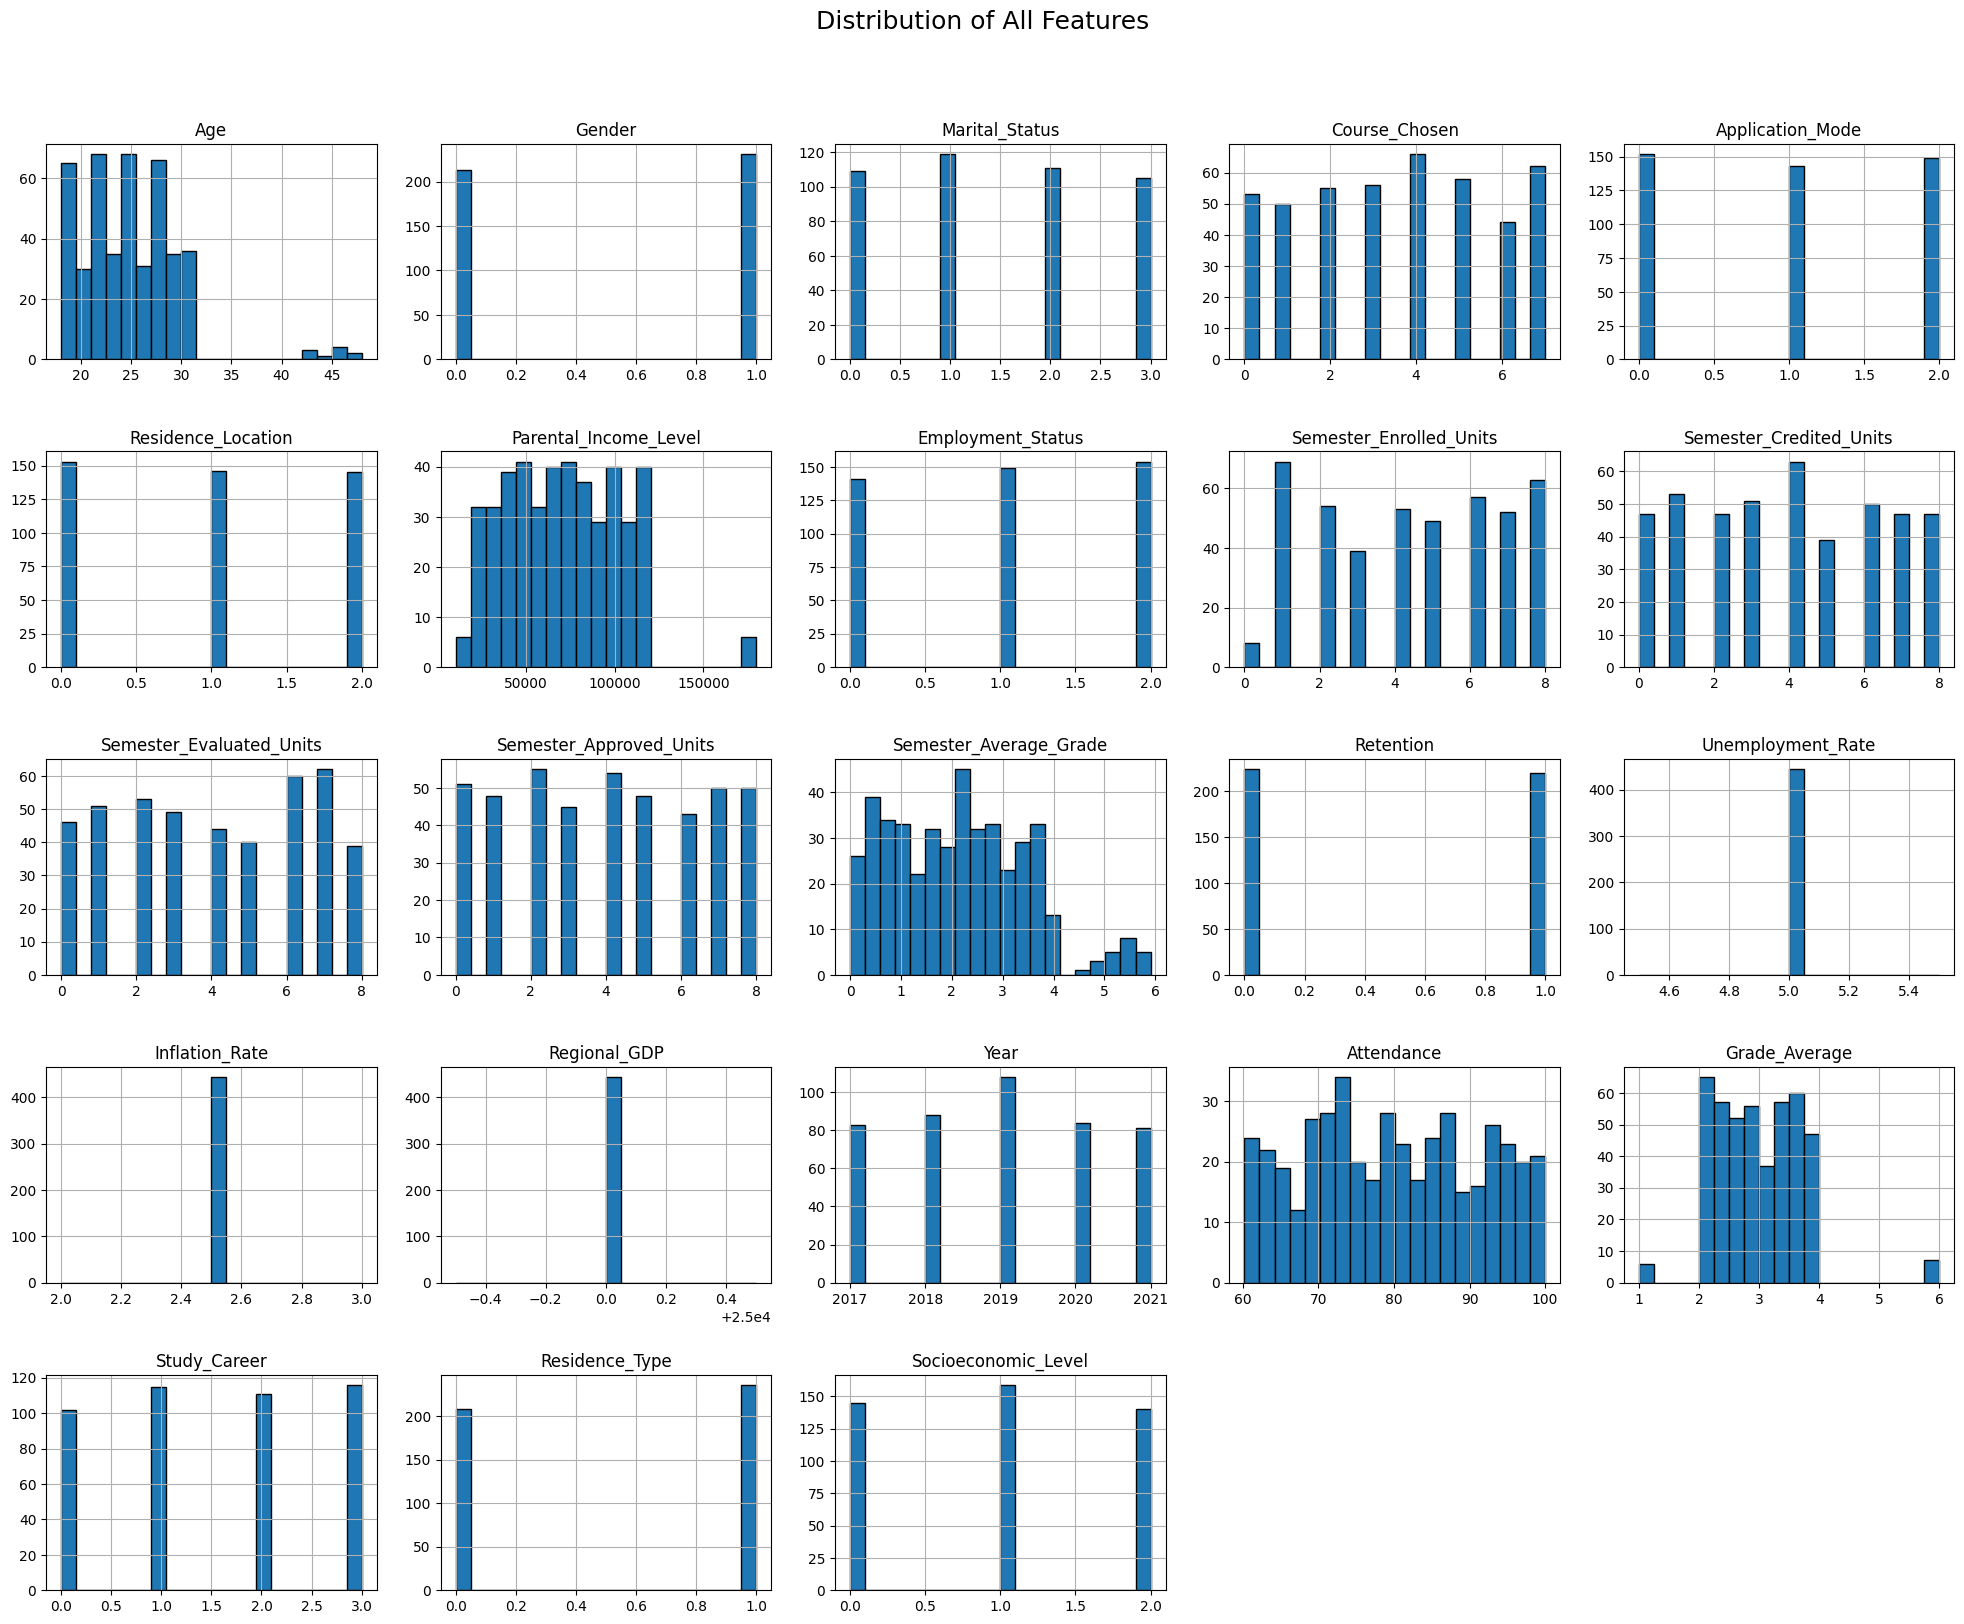

In [19]:
import matplotlib.pyplot as plt

# Larger figure and tighter layout
df.hist(bins=20, figsize=(20, 16), edgecolor="black")
plt.suptitle("Distribution of All Features", fontsize=18, y=1.02)
plt.tight_layout(pad=2)
plt.show()



# Correlation heatmap

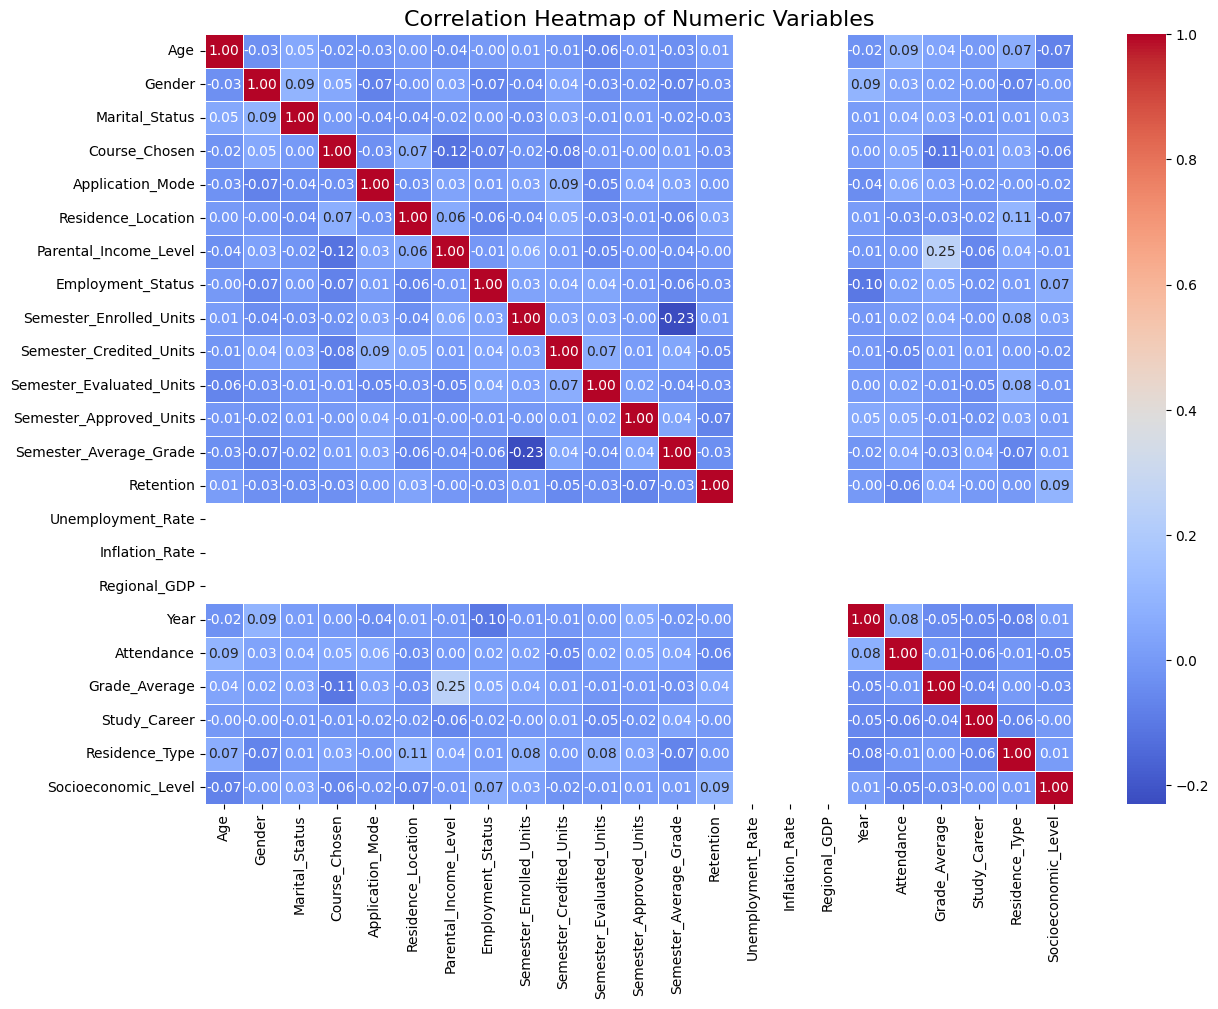

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.show()



# Relationships between key variables

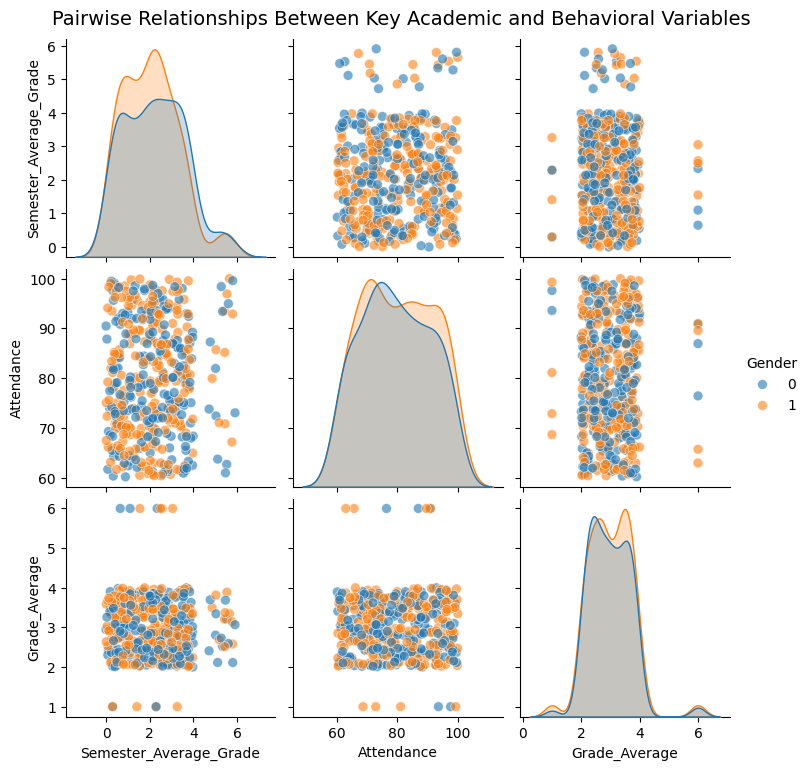

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric + categorical columns
sns.pairplot(
    df,
    vars=["Semester_Average_Grade", "Attendance", "Grade_Average"],
    hue="Gender",
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 50}
)

plt.suptitle("Pairwise Relationships Between Key Academic and Behavioral Variables", y=1.02, fontsize=14)
plt.show()



In [23]:
import os

# Create the visuals folder if it doesn’t already exist
os.makedirs(r"C:\Projects\education-performance-analytics\visuals", exist_ok=True)
print("✅ Folder ready!")


✅ Folder ready!


In [24]:
plt.savefig(r"C:\Projects\education-performance-analytics\visuals\pairplot_academic_relationships.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

# Batch-save all three visuals (histogram, heatmap, and pairplot)

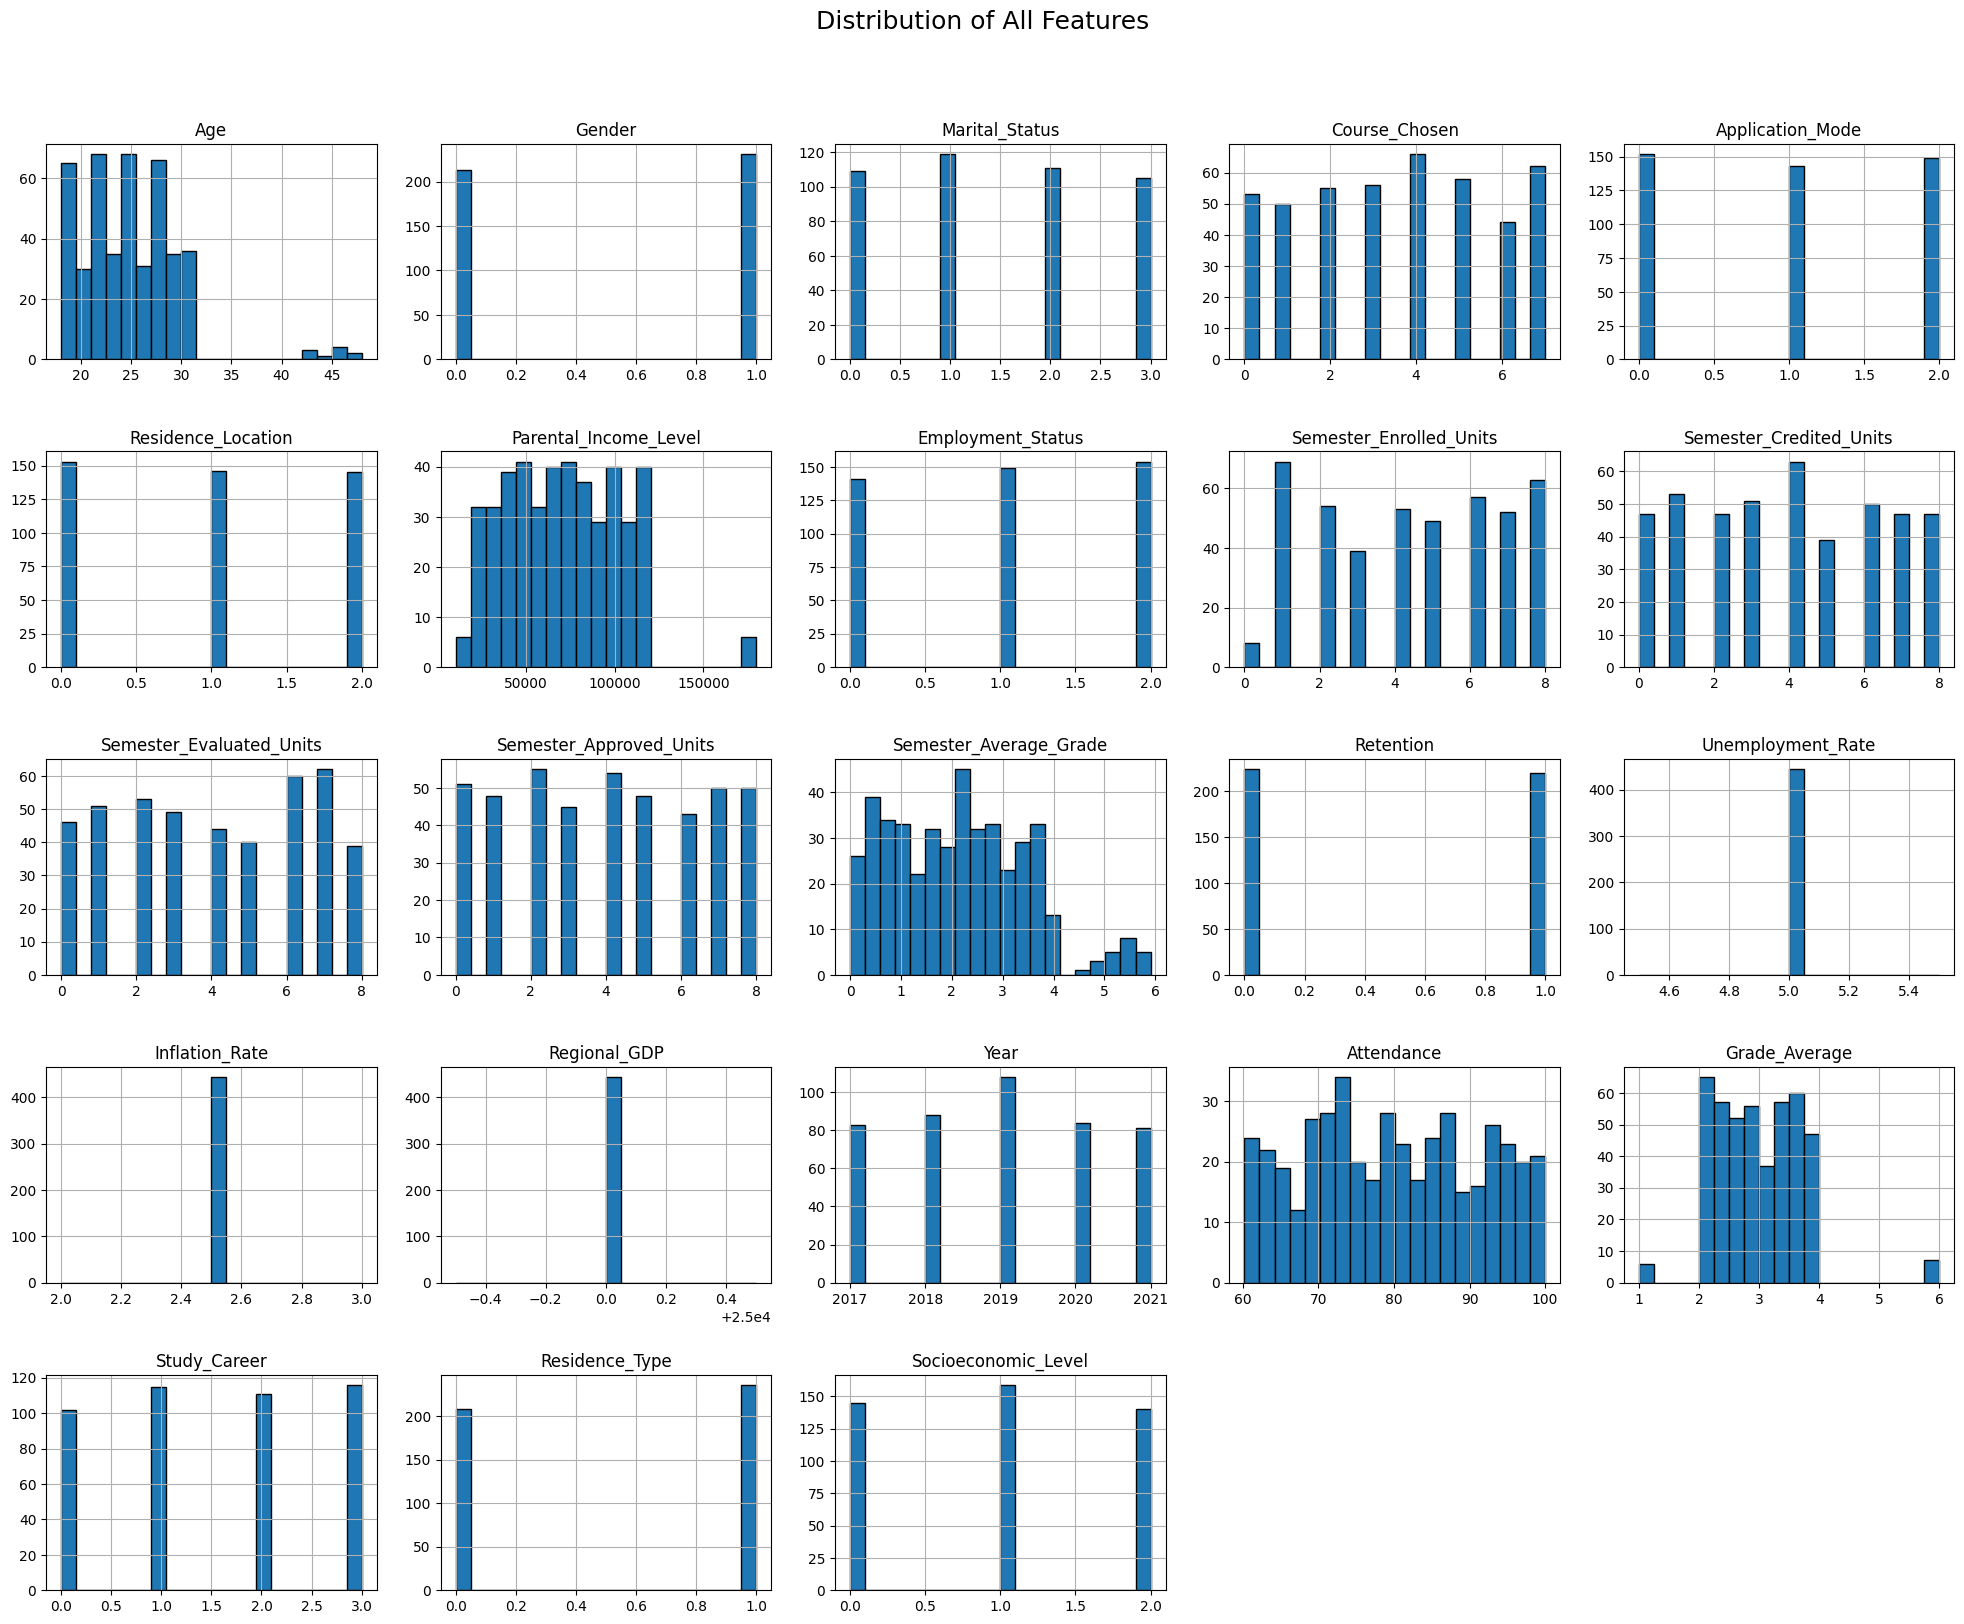

In [25]:
import matplotlib.pyplot as plt

# Create histogram
df.hist(bins=20, figsize=(20, 16), edgecolor="black")
plt.suptitle("Distribution of All Features", fontsize=18, y=1.02)
plt.tight_layout(pad=2)

# Save histogram
plt.savefig(r"C:\Projects\education-performance-analytics\visuals\histogram_all_features.png",
            dpi=300, bbox_inches='tight')
plt.show()


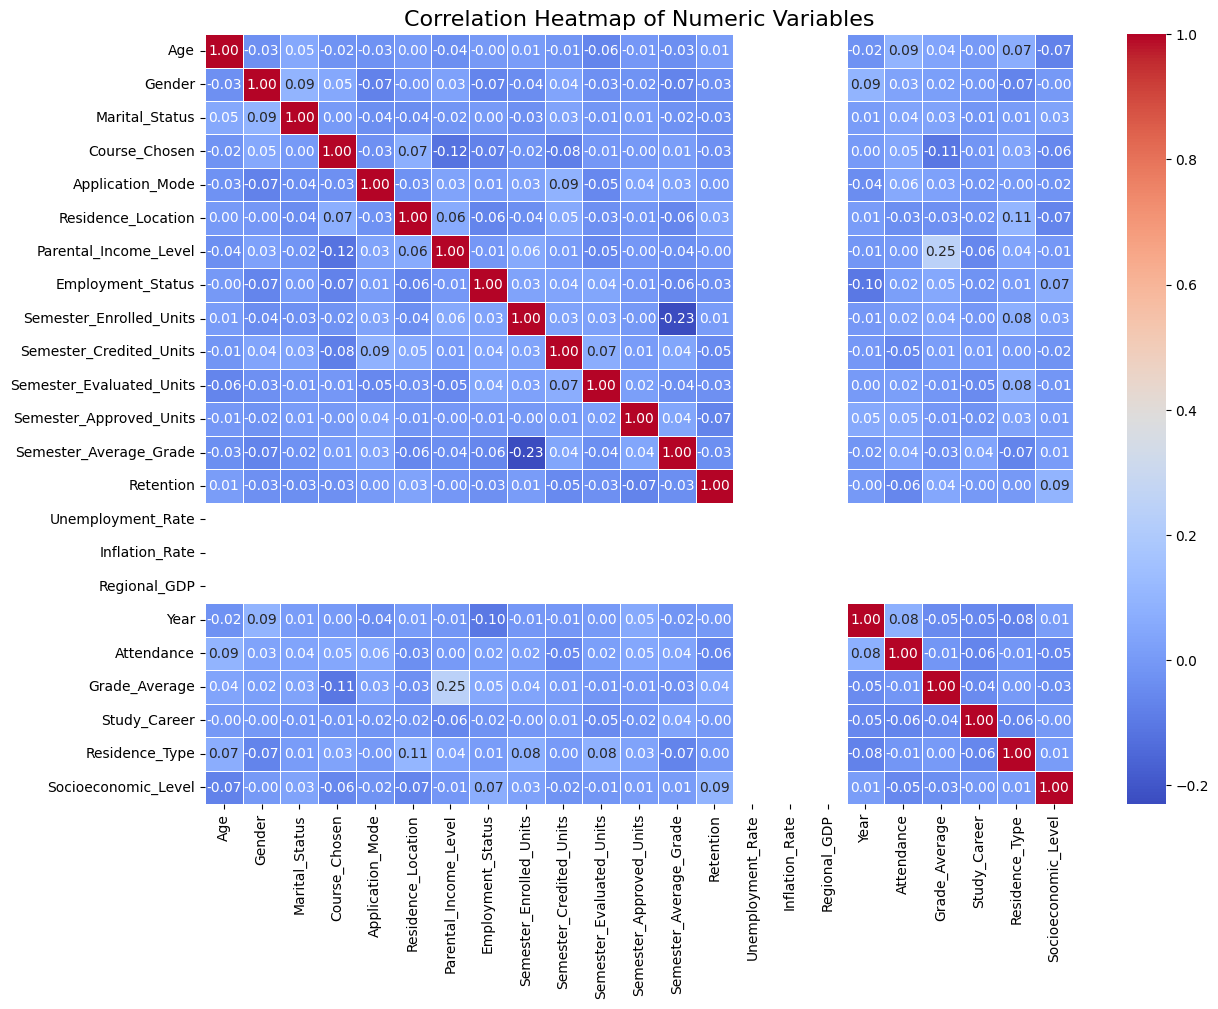

In [26]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)

# Save heatmap
plt.savefig(r"C:\Projects\education-performance-analytics\visuals\heatmap_correlations.png",
            dpi=300, bbox_inches='tight')
plt.show()



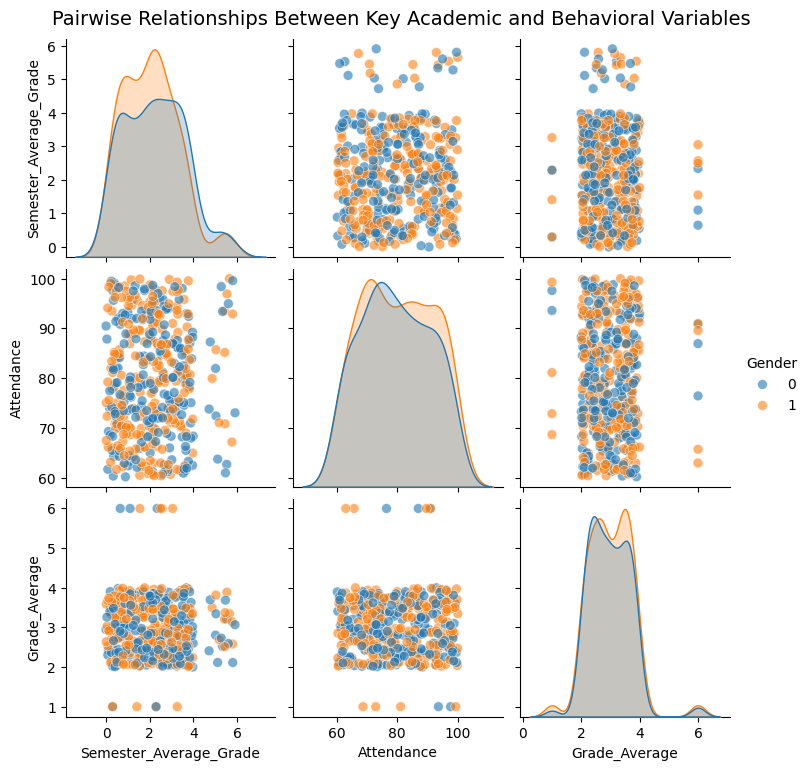

In [27]:
sns.pairplot(
    df,
    vars=["Semester_Average_Grade", "Attendance", "Grade_Average"],
    hue="Gender",
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 50}
)
plt.suptitle("Pairwise Relationships Between Key Academic and Behavioral Variables",
             y=1.02, fontsize=14)

# Save pairplot
plt.savefig(r"C:\Projects\education-performance-analytics\visuals\pairplot_academic_relationships.png",
            dpi=300, bbox_inches='tight')
plt.show()


In [28]:
import os
os.listdir(r"C:\Projects\education-performance-analytics\visuals")


['heatmap_correlations.png',
 'histogram_all_features.png',
 'pairplot_academic_relationships.png']